<a href="https://colab.research.google.com/github/HChandeepa/Lung_Sound_Classification_System/blob/Master/Audio_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Asthma/103_2b2_Ar_mc_LittC2SE_segment_1.wav'

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def plot_waveform(input_file,title='Waveform'):
  data,sample_rate = librosa.load(file_path,sr=None)
  plt.figure(figsize=(12,4))
  librosa.display.waveshow(data,sr=sample_rate)
  plt.title(title)
  plt.ylim([-1,1])
  plt.show()

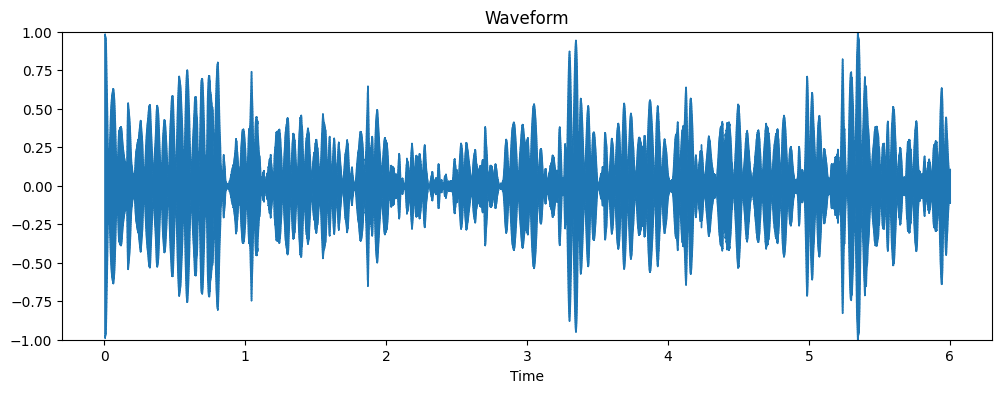

In [ ]:
plot_waveform(file_path)

In [ ]:
def check_rms_level(input_file):
    y, sr = librosa.load(input_file, sr=None)
    rms = librosa.feature.rms(y=y)
    mean_rms = rms.mean()
    print(f"RMS Level is : {mean_rms}")

# Example usage
check_rms_level(file_path)


RMS Level is : 0.2735520899295807


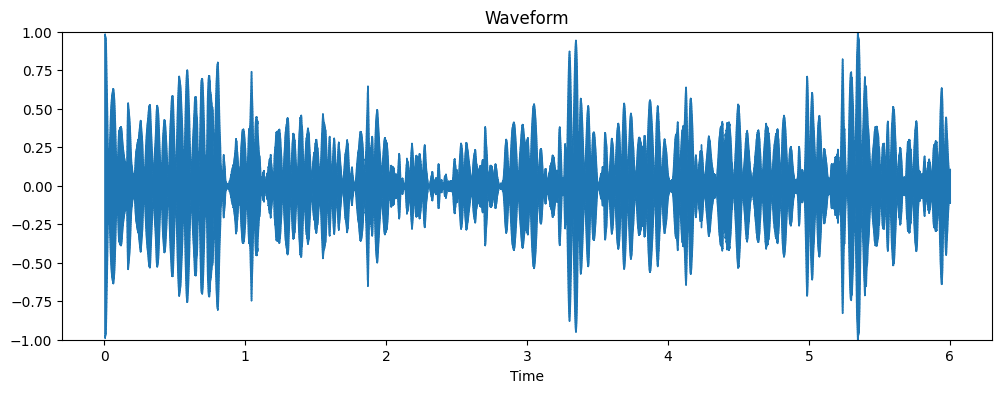

In [ ]:
plot_waveform('/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Asthma/EP9_Asthma,E W,P R L ,59,M_segment_1.wav')

In [ ]:
check_rms_level('/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Asthma/EP9_Asthma,E W,P R L ,59,M_segment_1.wav')

RMS Level is : 0.0507286973297596


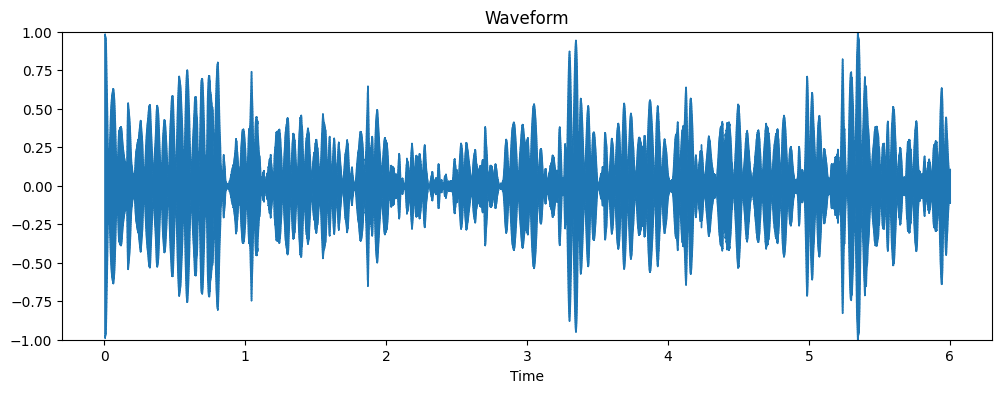

In [ ]:
plot_waveform('/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchiectasis/116_1b2_Tc_sc_Meditron_segment_0.wav')

In [ ]:
check_rms_level('/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchiectasis/168_1b1_Al_sc_Meditron_segment_3_aug102.wav')

RMS Level is : 0.013273551128804684


In [4]:
import os
import numpy as np

In [ ]:
def check_normalization(file_path):
  y, sr = librosa.load(file_path, sr=None)
  peak_amplitude = np.max(np.abs(y))
  rms_level = np.mean(librosa.feature.rms(y=y))
  return peak_amplitude, rms_level

In [ ]:
# Function to check all files in a folder
def check_folder_normalization(folder_path, threshold=0.01):
    files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        peak_amplitude, rms_level = check_normalization(file_path)

        # Check if peak amplitude is not close to 1 (normalized)
        if not (1 - threshold <= peak_amplitude <= 1 + threshold):
            print(f"File {file_name} in folder {folder_path} is NOT normalized!")
        else:
            print(f"File {file_name} in folder {folder_path} is normalized.")


In [ ]:
folders = {
    'Asthma': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Asthma',
    'Bronchiectasis': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchiectasis',
    'Bronchiolitis': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchiolitis',
    'COPD': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/COPD',
    'Healthy': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Healthy',
    'Pneumonia': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Pneumonia',
    'URTI': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/URTI',
    'Bronchitis': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchitis',
    'Lung Fibrosis':'/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Lung Fibrosis',
    'Plueral Effusion':'/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Plueral Effusion',
}

In [ ]:
for folder_name, folder_path in folders.items():
    print(f"\nChecking folder: {folder_name}")
    check_folder_normalization(folder_path, threshold=0.01)


Checking folder: Asthma
File BP10_Asthma,E W,P R U,59,M_segment_0.wav in folder /content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Asthma is normalized.
File BP38_Asthma,E W,P R M,38,M_segment_0.wav in folder /content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Asthma is normalized.
File BP15_Asthma,E W,P R U,49,F_segment_1.wav in folder /content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Asthma is NOT normalized!
File BP2_Asthma,E W,P L L R,52,F_segment_1.wav in folder /content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Asthma is NOT normalized!
File BP12_Asthma,E W,P L L,50,F_segment_2.wav in folder /content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Asthma is NOT normalized!
File BP3_Asthma,I E W,P L L R,50,F_segment_0.wav in folder /content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Asthma is NOT normalized!
File BP43_asthma,E W,P L M,15,M_segment_0.wav in folder /content/drive/MyDrive/

In [1]:
import os
import numpy as np
import librosa
import soundfile as sf

In [8]:
folders = {
    'Asthma': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Asthma',
    'Bronchiectasis': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchiectasis',
    'Bronchiolitis': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchiolitis',
    'COPD': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/COPD',
    'Healthy': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Healthy',
    'Pneumonia': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Pneumonia',
    'URTI': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/URTI',
    'Bronchitis': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchitis',
    'Lung Fibrosis':'/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Lung Fibrosis',
    'Plueral Effusion':'/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Plueral Effusion',
}

In [9]:
normalized_folders = {
    'Asthma': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Asthma Normalized',
    'Bronchiectasis': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchiectasis Normalized',
    'Bronchiolitis': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchiolitis Normalized',
    'COPD': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/COPD Normalized',
    'Healthy': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Healthy Normalized',
    'Pneumonia': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Pneumonia Normalized',
    'URTI': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/URTI Normalized',
    'Bronchitis': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Bronchitis Normalized',
    'Lung Fibrosis': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Lung Fibrosis Normalized',
    'Plueral Effusion': '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Plueral Effusion Normalized'
}


In [10]:
# Funnction to normalize audio
def min_max_normalize(audio_data):
  min_val = np.min(audio_data)
  max_val = np.max(audio_data)
  return 2*((audio_data - min_val)/(max_val - min_val)) - 1

In [11]:
for condition, folder_path in folders.items():
  print(f"Processing condition: {condition}")

  #Get the corrosponding normalized folder
  normalized_folder = normalized_folders[condition]

  #create the normalized folder if doesn't exists
  if not os.path.exists(normalized_folder):
    os.makedirs(normalized_folder)

  # Loop through all files in the folder
  for filename in os.listdir(folder_path):
    if filename.endswith('.wav'):
      file_path = os.path.join(folder_path,filename)

      #load the audio file
      audio_data, sample_rate = librosa.load(file_path,sr=None)


      #apply min-max normalization
      normalized_audio = min_max_normalize(audio_data)

      #save the normalized audio to a new file in the normalized folder
      output_path = os.path.join(normalized_folder,f"normalized_{filename}")
      sf.write(output_path,normalized_audio,sample_rate)

      print(f"Normalized {filename} saved to {output_path}")

  print("Processing complete!")


Processing condition: Asthma
Normalized BP10_Asthma,E W,P R U,59,M_segment_0.wav saved to /content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Asthma Normalized/normalized_BP10_Asthma,E W,P R U,59,M_segment_0.wav
Normalized BP38_Asthma,E W,P R M,38,M_segment_0.wav saved to /content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Asthma Normalized/normalized_BP38_Asthma,E W,P R M,38,M_segment_0.wav
Normalized BP15_Asthma,E W,P R U,49,F_segment_1.wav saved to /content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Asthma Normalized/normalized_BP15_Asthma,E W,P R U,49,F_segment_1.wav
Normalized BP2_Asthma,E W,P L L R,52,F_segment_1.wav saved to /content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Asthma Normalized/normalized_BP2_Asthma,E W,P L L R,52,F_segment_1.wav
Normalized BP12_Asthma,E W,P L L,50,F_segment_2.wav saved to /content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sounds Dataset/Asthma Normalized/normalized_BP12_Asthma,E W